<h3>1. Training the model</h3>
<p>First, I am training the model to learn the data from student-scores.csv <br>
I have taken the dataset from Kaggle - https://www.kaggle.com/datasets/mexwell/student-scores.<p>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [74]:
scores_data = pd.read_csv('student-scores.csv')

In [75]:
scores_data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [76]:
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [77]:
scores_data.drop(columns=['id', 'first_name', 'last_name', 'email', 'career_aspiration'], inplace = True)
scores_data.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,73,81,93,97,63,80,87
1,female,False,2,False,47,90,86,96,100,90,88,90
2,female,False,9,True,13,81,97,95,96,65,77,94
3,female,False,5,False,3,71,74,88,80,89,63,86
4,male,False,5,False,10,84,77,65,65,80,74,76


In [78]:
scores_data['gender'].replace({'male': 0, 'female' : 1}, inplace = True)
scores_data['part_time_job'].replace({True: 1, False : 0}, inplace = True)
scores_data['extracurricular_activities'].replace({True: 1, False : 0}, inplace = True)
scores_data.head()

C:\Users\harri\AppData\Local\Temp\ipykernel_9196\3225094385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scores_data['gender'].replace({'male': 0, 'female' : 1}, inplace = True)
C:\Users\harri\AppData\Local\Temp\ipykernel_9196\3225094385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sco

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,0,0,3,0,27,73,81,93,97,63,80,87
1,1,0,2,0,47,90,86,96,100,90,88,90
2,1,0,9,1,13,81,97,95,96,65,77,94
3,1,0,5,0,3,71,74,88,80,89,63,86
4,0,0,5,0,10,84,77,65,65,80,74,76


In [79]:
print(scores_data.isnull().sum())

scores_data.dropna(inplace=True)

gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


<h3>Plotting the data</h3>

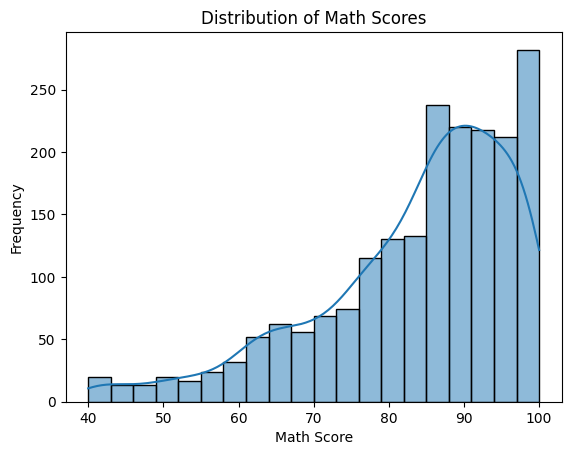

In [80]:
sns.histplot(scores_data['math_score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

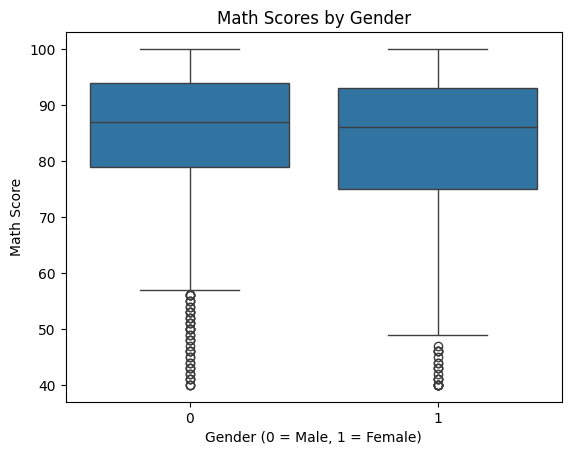

In [81]:
sns.boxplot(x='gender', y='math_score', data=scores_data)
plt.title('Math Scores by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Math Score')
plt.show()

Text(0.5, 1.0, 'Paiplot of all columns')

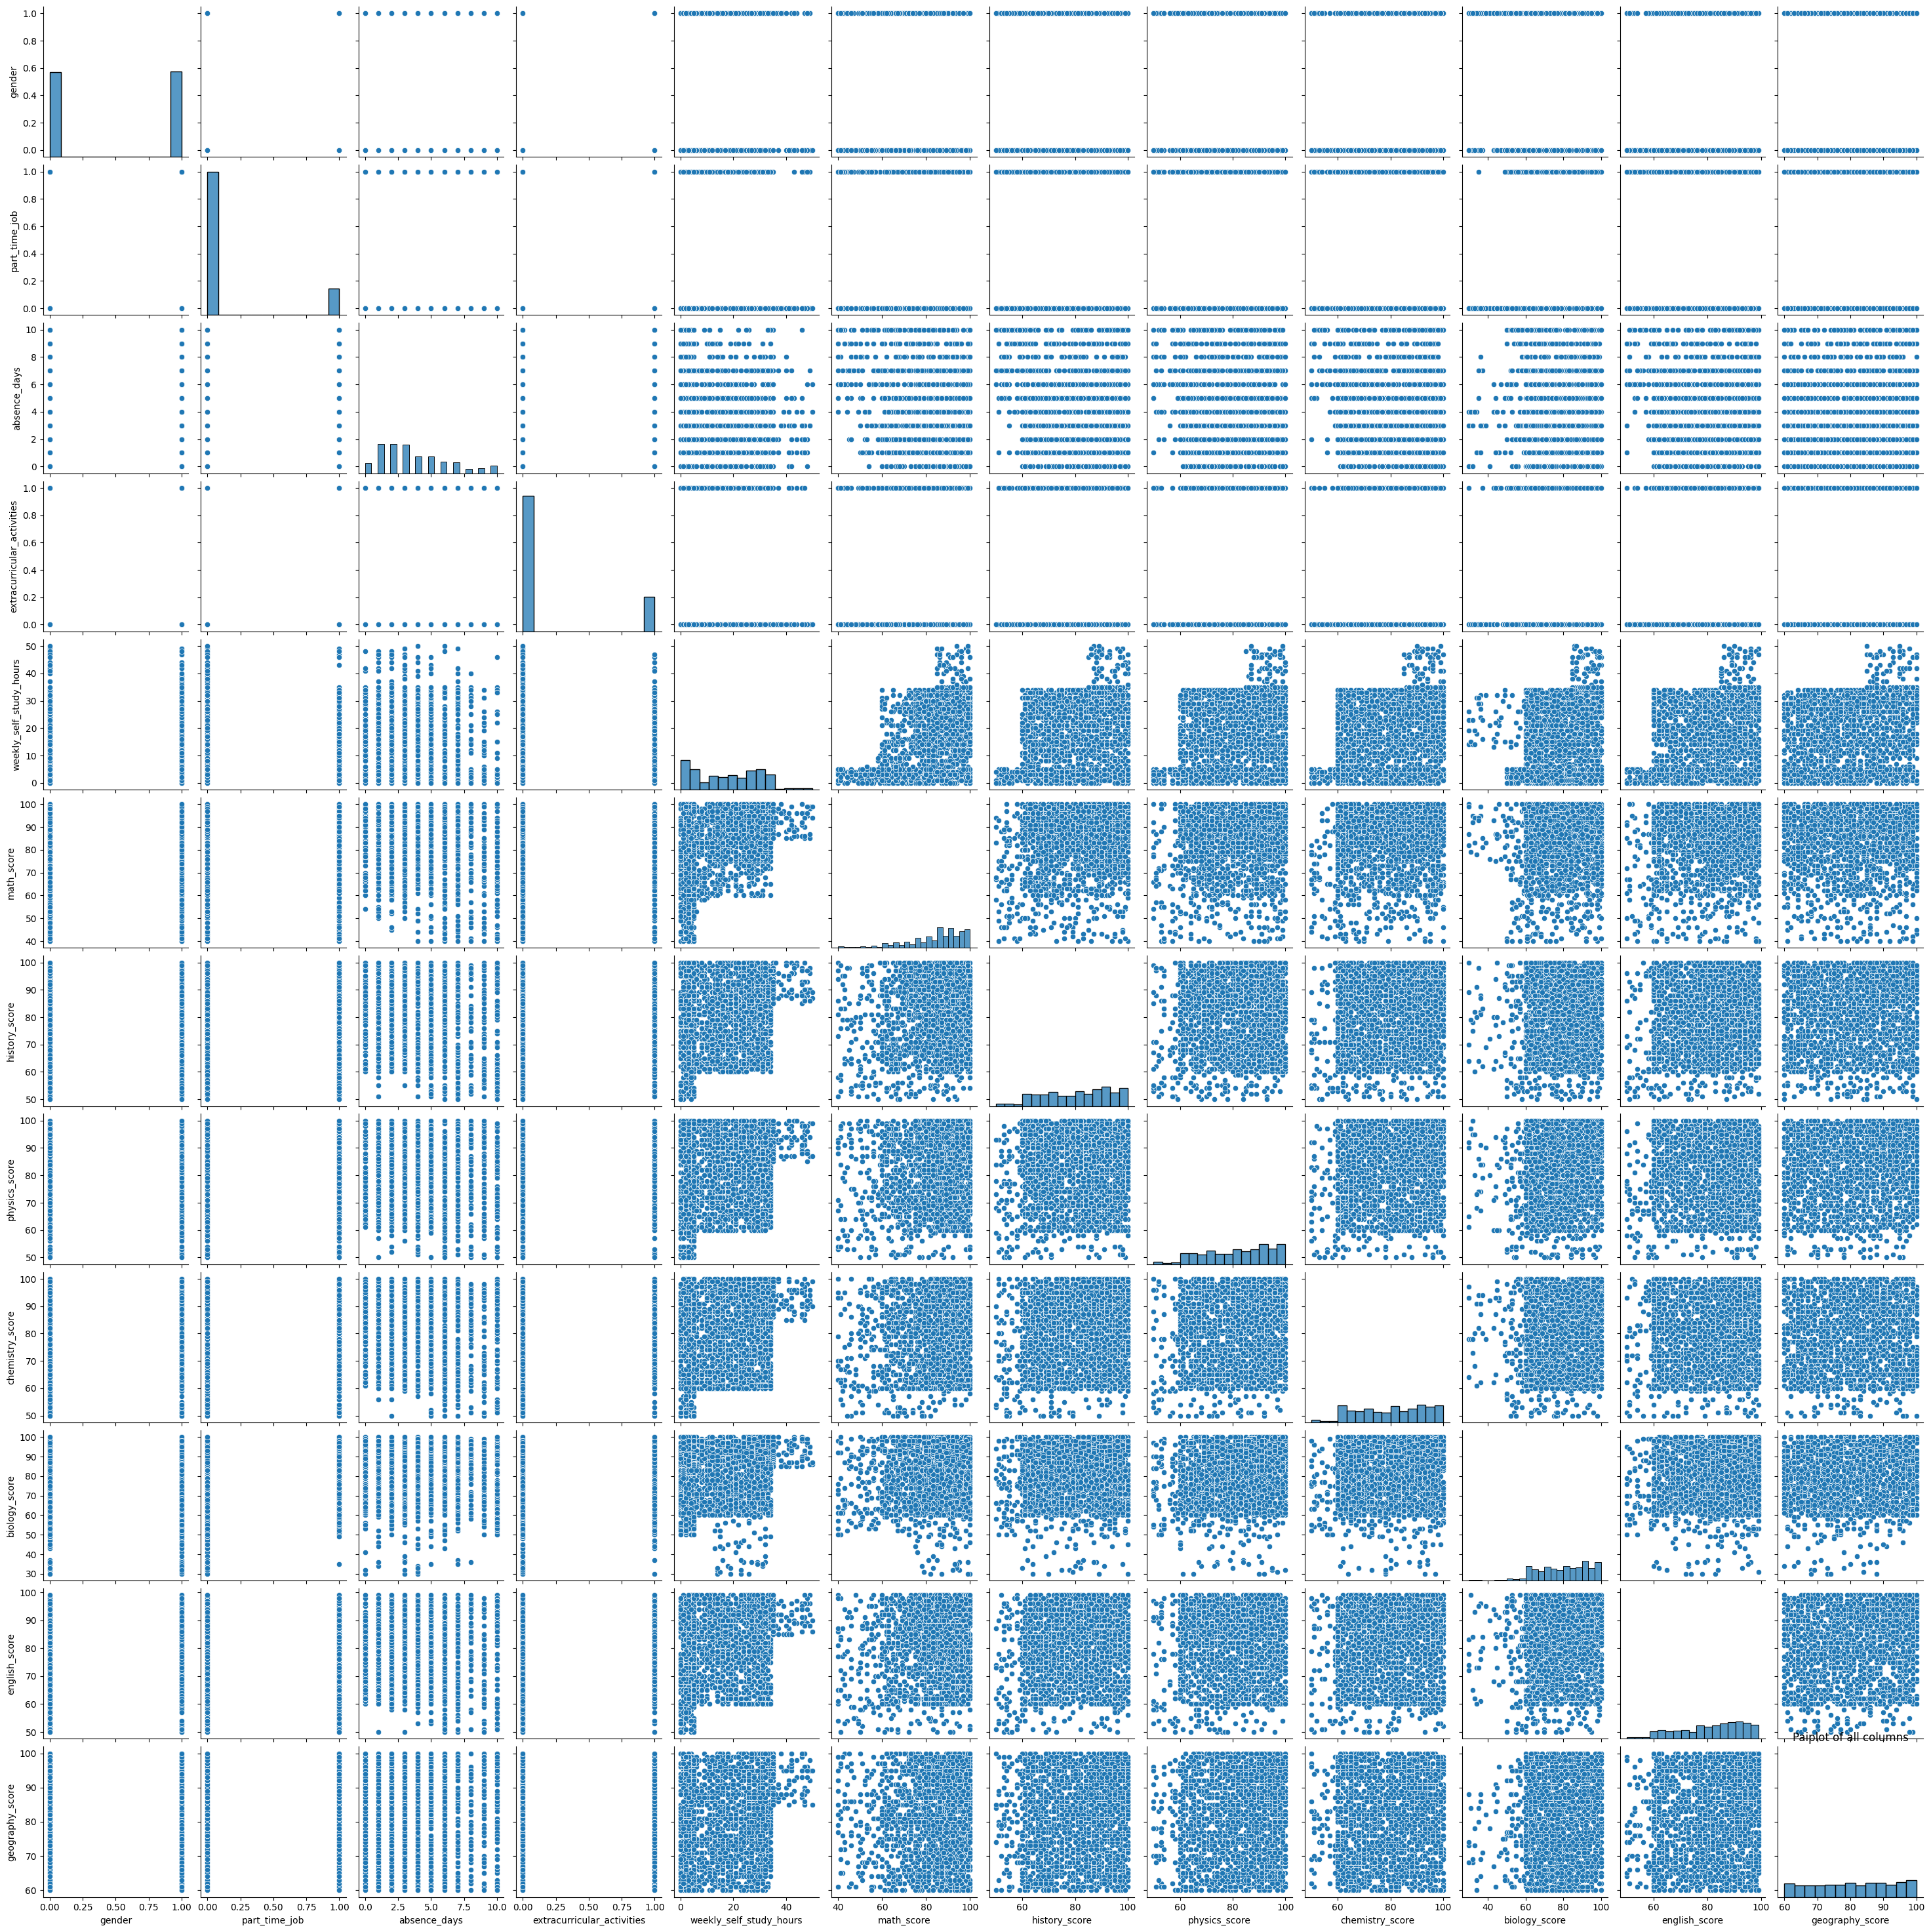

In [82]:
sns.pairplot(scores_data)
plt.title('Paiplot of all columns')

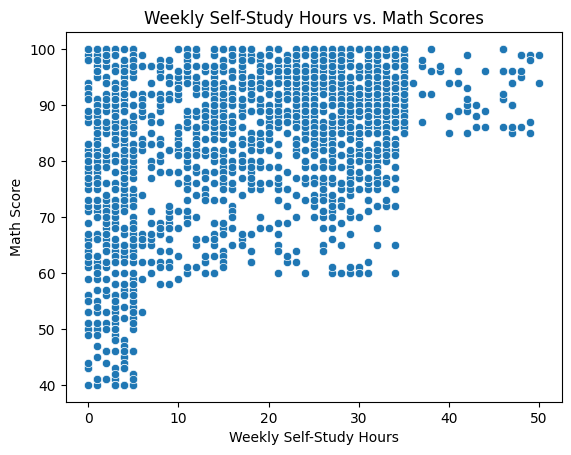

In [83]:
sns.scatterplot(x='weekly_self_study_hours', y='math_score', data=scores_data)
plt.title('Weekly Self-Study Hours vs. Math Scores')
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Math Score')
plt.show()

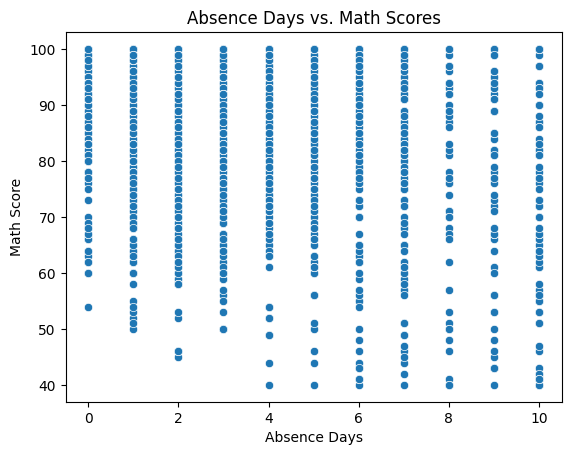

In [84]:
sns.scatterplot(x='absence_days', y='math_score', data=scores_data)
plt.title('Absence Days vs. Math Scores')
plt.xlabel('Absence Days')
plt.ylabel('Math Score')
plt.show()

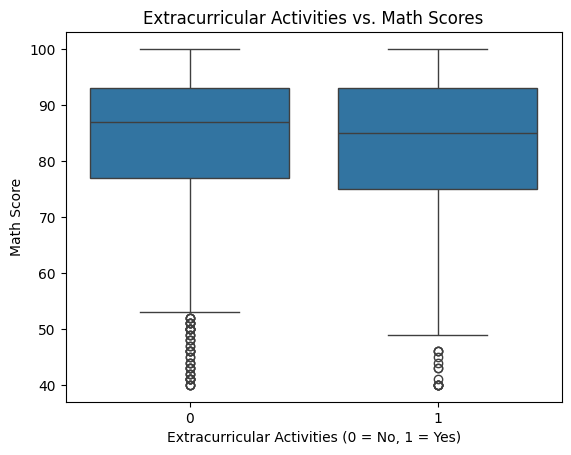

In [85]:
sns.boxplot(x='extracurricular_activities', y='math_score', data=scores_data)
plt.title('Extracurricular Activities vs. Math Scores')
plt.xlabel('Extracurricular Activities (0 = No, 1 = Yes)')
plt.ylabel('Math Score')
plt.show()

<h4><em>Creating a target variable</em></h4>

In [86]:
scores_data['high_score'] = (scores_data['math_score'] > 85).astype(int)

<h4><em>Splitting the data</em></h4>

In [87]:
X = scores_data.drop(columns=['math_score', 'high_score'])
y = scores_data['high_score']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

<h4><em>Train the model</em></h4>

In [89]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4><em>Evaluate the model</em></h4>

In [90]:
from sklearn.metrics import classification_report, accuracy_score


predictions = logmodel.predict(X_test)


accuracy = logmodel.score(X_test, y_test)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6425
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       181
           1       0.66      0.73      0.69       219

    accuracy                           0.64       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.64      0.64      0.64       400



<h3>Testing on custom data</h3>

In [91]:
# Example data for a new student
new_student = pd.DataFrame({
    'gender': [0],  # Male
    'part_time_job': [1],  # I work part time
    'absence_days': [0],  # 0 absence days
    'extracurricular_activities': [1],  # Participates in extracurricular activities
    'weekly_self_study_hours': [20],  # 20 hours of self-study per week
    'history_score': [96],  # Random value
    'physics_score': [96],  # Random value
    'chemistry_score': [93], # Random value
    'biology_score': [80],  # Random value
    'english_score': [95],  # Random value
    'geography_score': [94],  # Random value
})

# Predict if I will score more than 85 in maths?
prediction = logmodel.predict(new_student)
print(f"Will the student score above 85 in math? {'Yes' if prediction[0] == 1 else 'No'}")


Will the student score above 85 in math? Yes


<h3>2. Creating the Web Service</h3>
<p>I am now going to create the necessary endpoints so that my model can be accessed through the web. Meaning, If the correct feature variables are passed as json, my web service should be able to make predicitons. <br>
I am using flask for creating the web service</p>

In [92]:
from flask import Flask, request
app = Flask(__name__)

In [93]:
# Defining a GET endpoint to provide a sample record in json format
@app.get("/score/sample")

def get_example():

    return scores_data.drop("high_score", axis=1).iloc[0].to_json(orient="index")

In [94]:
#Defining a GET endpoint to that provides an explanation for the sample that is returned if a request is made to /score/sample
@app.get("/score/explain")
def explain_fields():
    explanation = {
        "gender": "Represents the gender of the student. Enter 0 for Male, 1 for Female.",
        "part_time_job": "Indicates whether the student has a part-time job. Enter 1 for Yes, 0 for No.",
        "absence_days": "Number of days the student was absent. Enter an integer value.",
        "extracurricular_activities": "Indicates whether the student participates in extracurricular activities. Enter 1 for Yes, 0 for No.",
        "weekly_self_study_hours": "Number of hours the student spends on self-study each week. Enter an integer value.",
        "history_score": "Score obtained in History. Enter an integer value.",
        "physics_score": "Score obtained in Physics. Enter an integer value.",
        "chemistry_score": "Score obtained in Chemistry. Enter an integer value.",
        "biology_score": "Score obtained in Biology. Enter an integer value.",
        "english_score": "Score obtained in English. Enter an integer value.",
        "geography_score": "Score obtained in Geography. Enter an integer value."
    }
    return explanation

In [95]:
# Defining a POST endpoint to predict math score based on the body of the POST
@app.post("/score/evaluate")

def predictscore():

    if request.is_json:

        df = pd.DataFrame([request.get_json()])

        result = logmodel.predict(df)

        return {"Will the student score above 85 in math?": f"{'Yes' if result[0] == 1 else 'No'}"}

    return {"error": "Request must be JSON"}

In [96]:
#Running the web service app
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Jul/2024 03:04:17] "GET /score/explain HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2024 03:05:50] "GET /score/explain HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2024 03:06:14] "GET /score/sample HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2024 03:06:38] "GET /score/sample HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2024 03:06:38] "GET /score/explain HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2024 03:06:38] "POST /score/evaluate HTTP/1.1" 200 -
